In [1]:
import numpy as np
import plotter as pltr

In [2]:
pltr.set_backend(pltr.MatplotlibBackend)

In [3]:
def plot(signal):
    signal = np.copy(signal)
    
    frame = pltr.Frame(height_px=1000, width_px=1500)
    frame.layout(nrows=2, ncols=2)
    
    timesteps = list(range(len(signal)))
    
    real_vals = np.copy(signal.real)
    real_vals[np.argwhere(np.isclose(real_vals, 0.))] = 0.
    real = frame.create_chart()
    real.title = 'Real'
    real_stem = pltr.Stem(timesteps, real_vals)
    real.add(real_stem)
    
    imag_vals = np.copy(signal.imag)
    imag_vals[np.argwhere(np.isclose(imag_vals, 0.))] = 0.
    imag = frame.create_chart()
    imag.title = 'Imaginary'
    imag_stem = pltr.Stem(timesteps, imag_vals)
    imag.add(imag_stem)

    signal[np.argwhere(np.isclose(signal, 0))] = 0.
    
    mag = frame.create_chart()
    mag.title = 'Magnitude'
    mag_stem = pltr.Stem(timesteps, np.sqrt(signal.real**2 + signal.imag**2))
    mag.add(mag_stem)
    
    phase = frame.create_chart()
    ticks = [-np.pi, -0.75*np.pi, -0.5*np.pi, -0.25*np.pi, 0, 0.25*np.pi, 0.5*np.pi, 0.75*np.pi, np.pi]
    tick_labels = ['-π', '-3π/4', '-π/2', '-π/4', '0', 'π/4', 'π/2', '3π/4', 'π']
    phase.y_axis = pltr.Axis(ticks=ticks, tick_labels=tick_labels)
    phase.title = 'Phase'
    phase_stem = pltr.Stem(list(range(len(signal))), np.angle(signal))
    phase.add(phase_stem)
    
    frame.show()

In [4]:
def freq_domain_basis(num_timesteps):
    N = num_timesteps
    W = []
    for k in range(N):
        w = np.exp(np.complex(0, -2*np.pi*k/N))
        w_k = np.array([w**n for n in range(N)])
        W.append(w_k)
    return np.array(W)

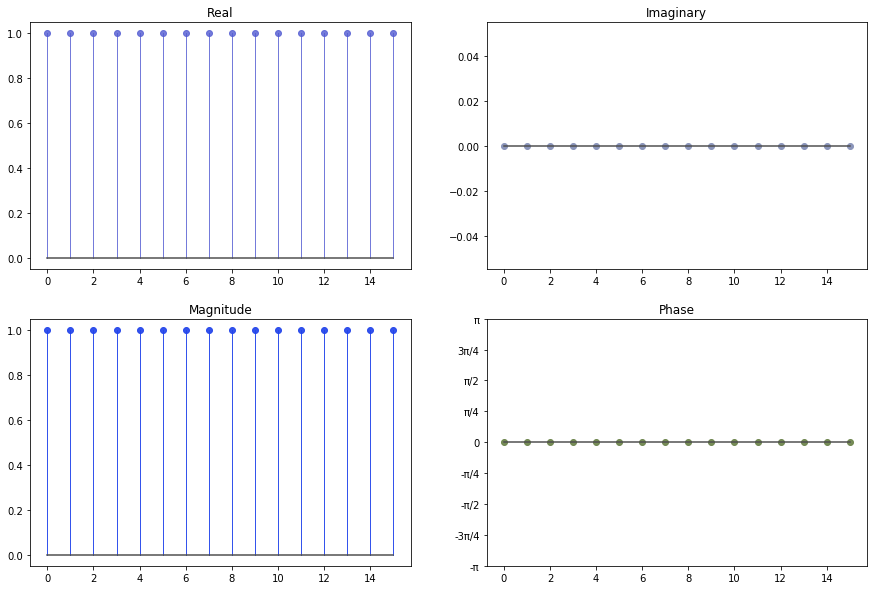

In [5]:
x = np.array([1.]*16)
plot(x)

True


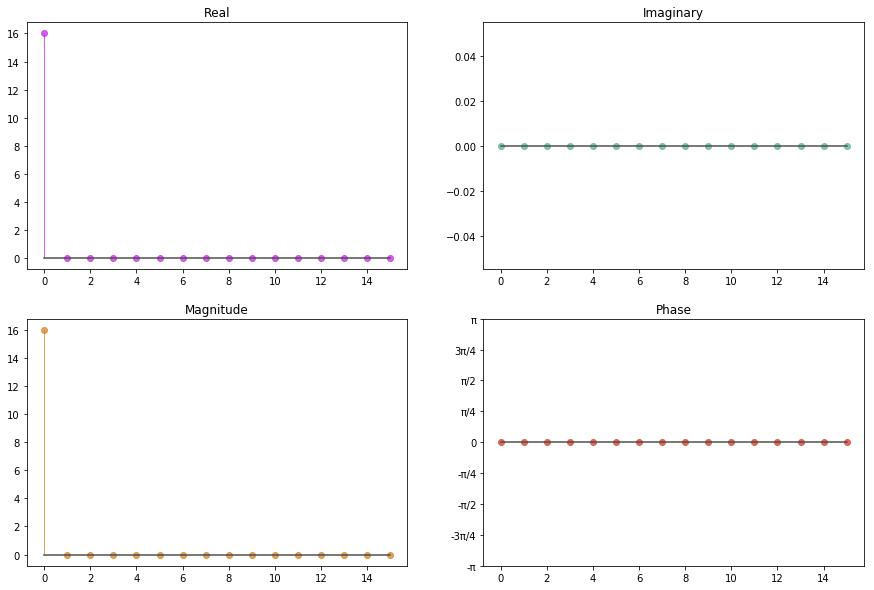

In [6]:
W = freq_domain_basis(16)
y = W@x
print(np.allclose(y, np.fft.fft(x)))
plot(y)

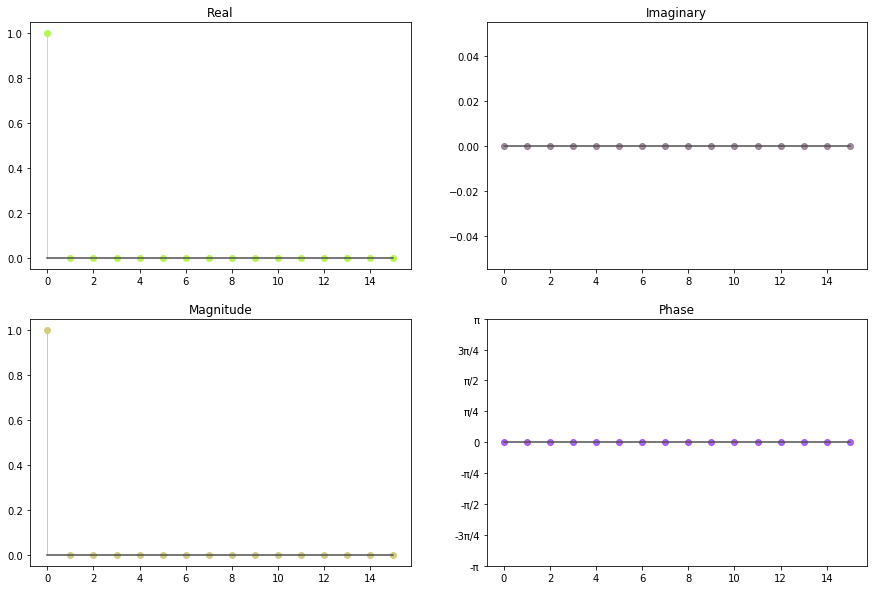

In [7]:
x = np.array([0.]*16)
x[0] = 1.
plot(x)

True


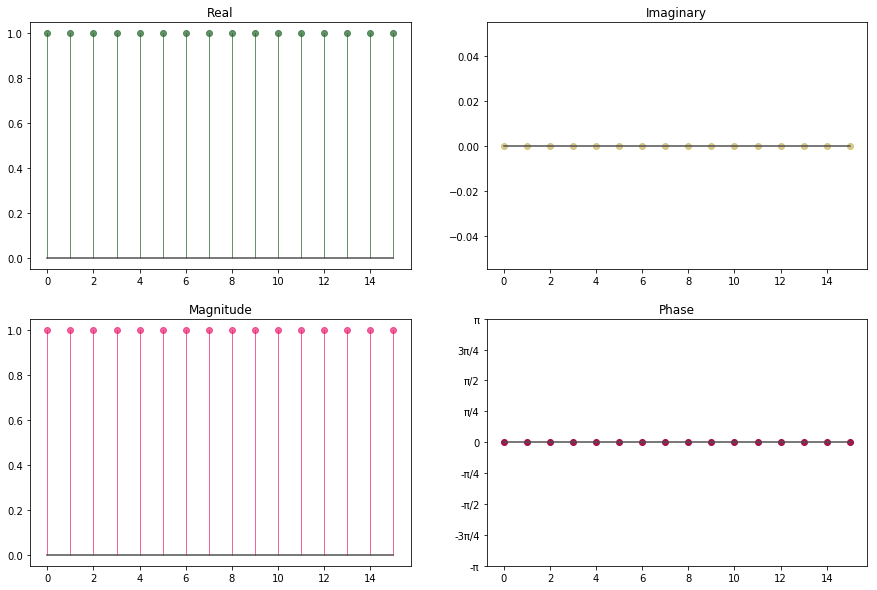

In [8]:
W = freq_domain_basis(16)
y = W@x
print(np.allclose(np.fft.fft(x), y))
plot(y)

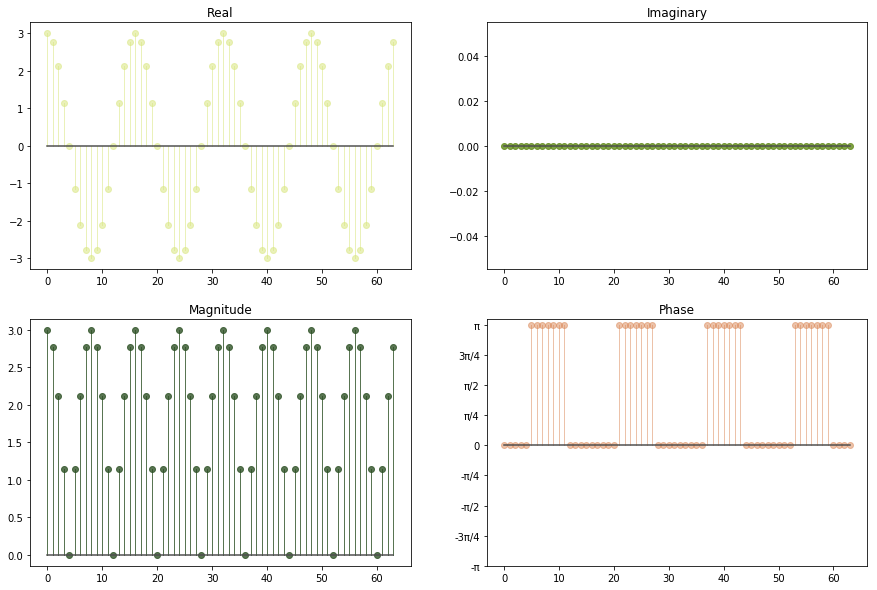

In [9]:
x = np.array([3*np.cos(2*np.pi*n/16) for n in range(64)])
plot(x)

True


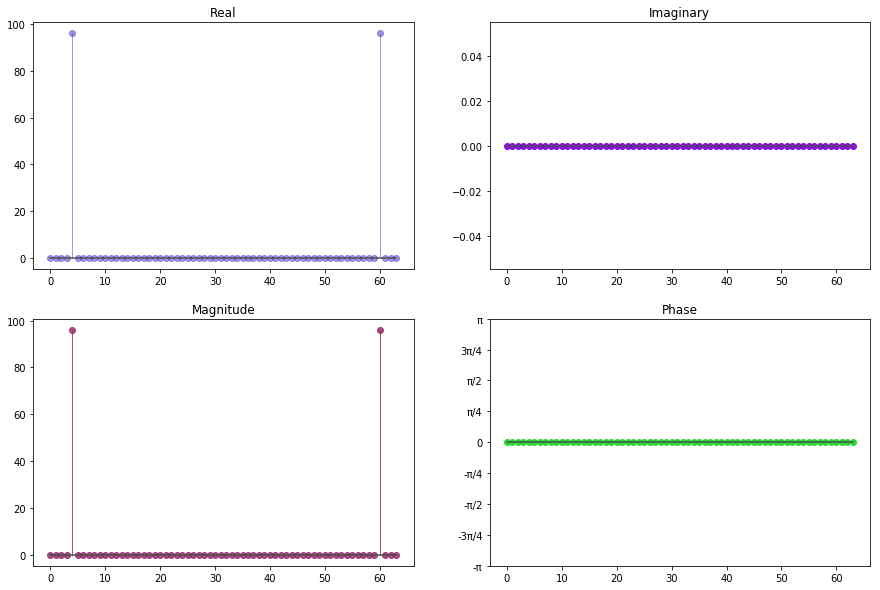

In [10]:
W = freq_domain_basis(64)
y = W@x
print(np.allclose(np.fft.fft(x), y))
plot(y)

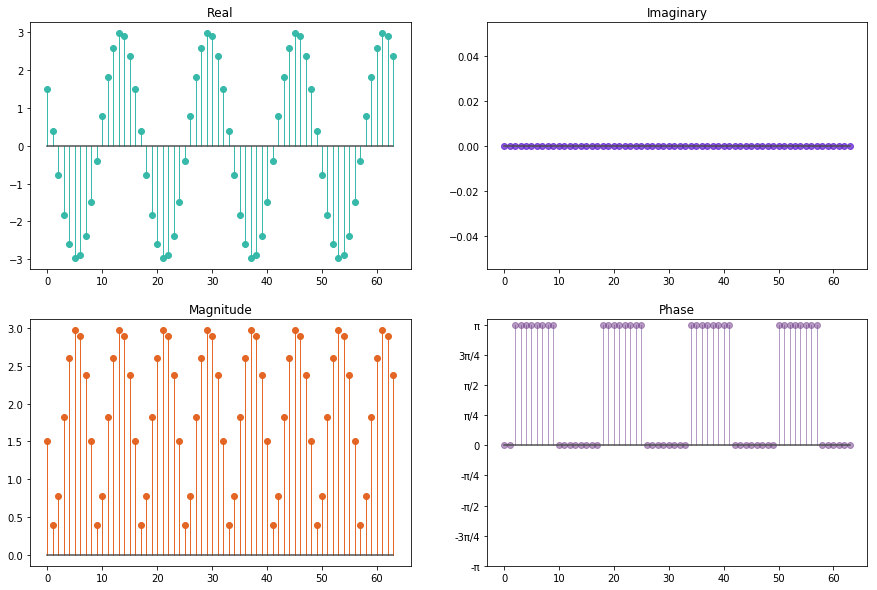

In [11]:
x = np.array([3*np.cos(2*np.pi*n/16 + np.pi/3) for n in range(64)])
plot(x)

True


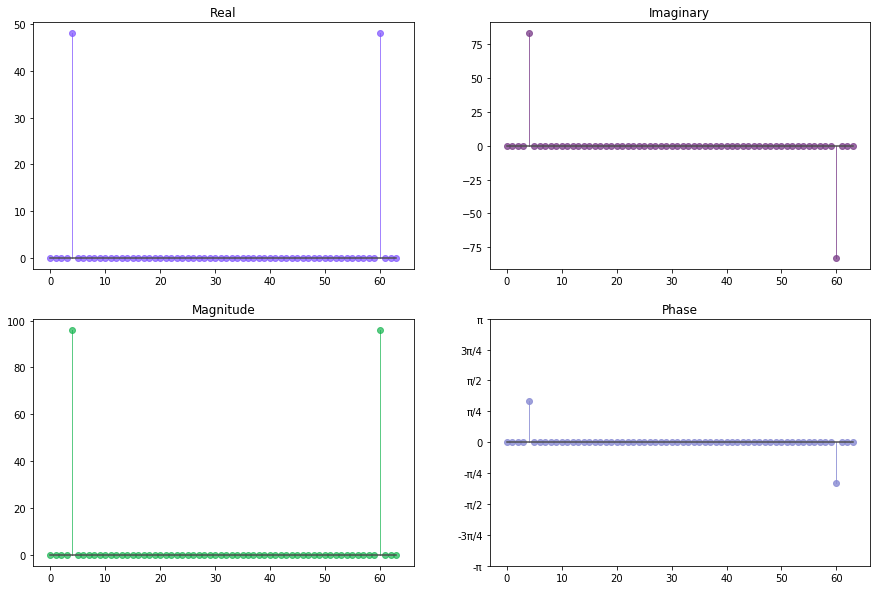

In [12]:
W = freq_domain_basis(64)
y = W@x
print(np.allclose(np.fft.fft(x), y))
plot(y)

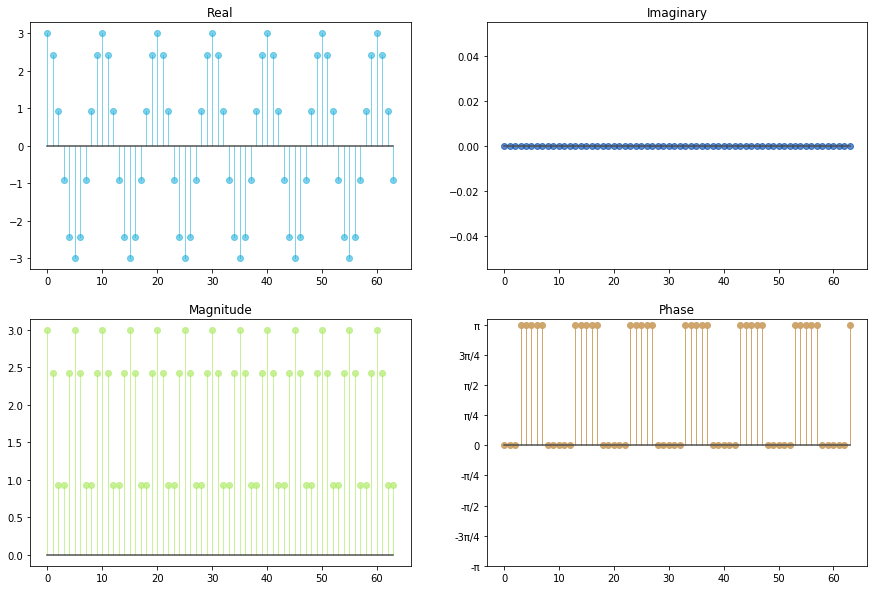

In [13]:
x = np.array([3*np.cos(2*np.pi*n/10) for n in range(64)])
plot(x)

True


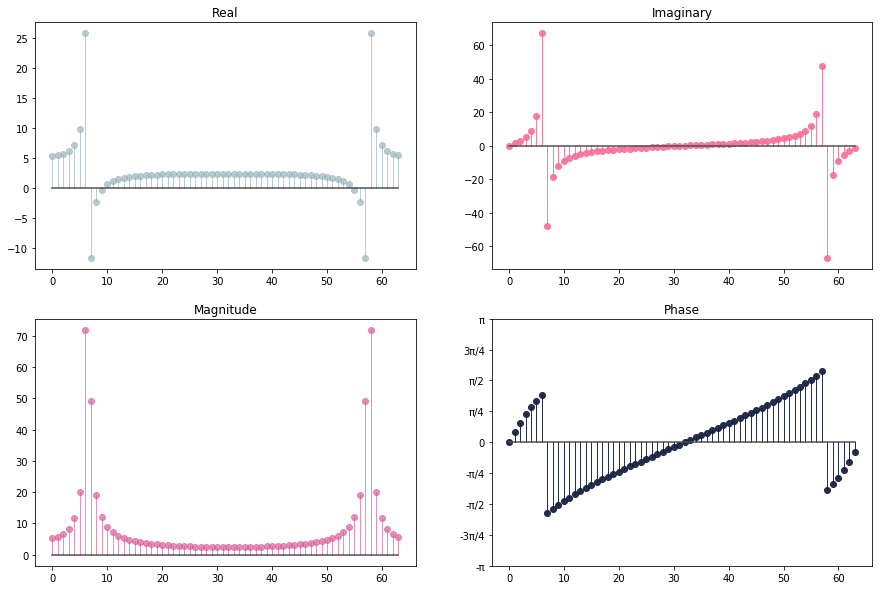

In [14]:
W = freq_domain_basis(64)
y = W@x
print(np.allclose(np.fft.fft(x), y))
plot(y)

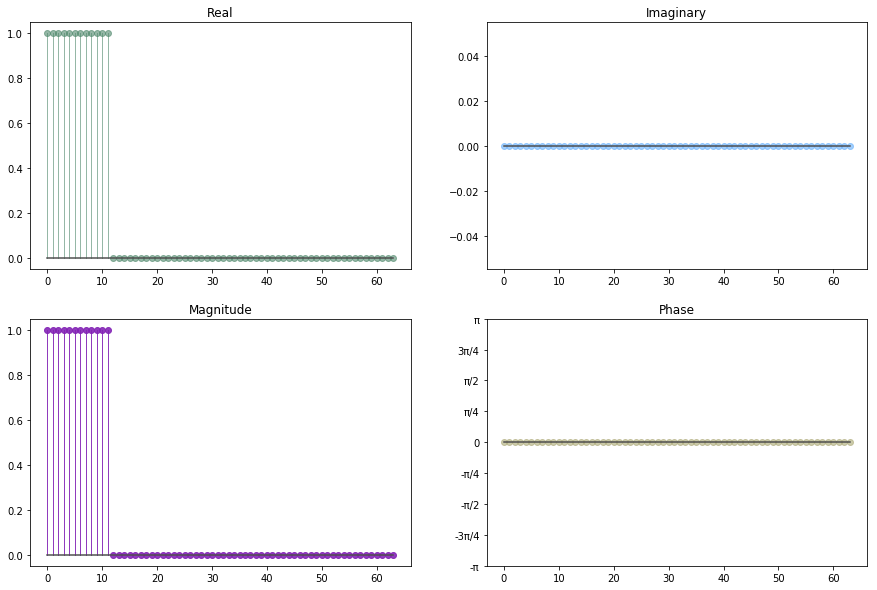

In [15]:
x = np.zeros(64)
x[:12] = 1.
plot(x)

True


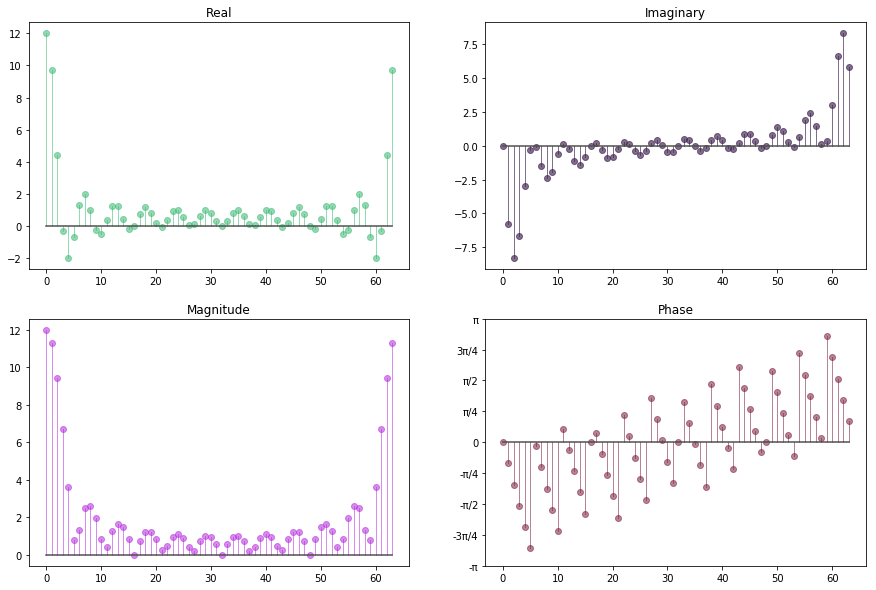

In [16]:
W = freq_domain_basis(64)
y = W@x
print(np.allclose(np.fft.fft(x), y))
plot(y)